# Adidas sales throughout COVID in the United States

# Introduction

**Purpose:**

The purpose of this project is to delve into Adidas's sales data during the peak of the COVID-19 pandemic, focusing on:

 - Identifying sales trends.
 - Understanding which products excelled.
 - Performing regional analyses to determine which sections of the country flourished in specific areas.

By taking a closer look at the data, this project aims to provide Adidas with actionable findings to:

 - Ensure continued growth.
 - Strengthen marketing campaigns to focus on exemplary products and peak sale periods.
 - Lead Adidas into the post-pandemic landscape.

**Dataset Overview:**  
This project uses one dataset, `adidas_sales_data.csv`. To ensure that there is a unique identifier, the data will add a unique column called `'transaction_record'` that will number each transaction without repeats. This will also allow for more high level analyses during the remainder of the project. The table consists of columns: 

  - **transaction_record**: uniquely lists all invoices, starting from 1
  - **invoice_date**: lists invoice date, will not be present if no sales were recorded
  - **retailer_id**: retailer identifier (not unique)
  - **retailer**: name of the retailer selling Adidas products
  - **region**: each state in the United States will be grouped into a respective region— West, Southwest, Midwest, Southeast, Northeast
  - **state**: each individual state
  - **city**: presumably the best selling city in each state(Need to find supporting details)
  - **transaction_record**: uniquely lists all invoices, becomes a foreign key that allows referencing to reigonal_data table  - **product_catgeory**: the name of the product category that is currently sold
  - **price_per_unit**: the price for every unit sold
  - **units_sold**: the number of units sold for any given invoice date
  - **total_sales**: total number of sales for any given invoice date
  - **operating_profit**: earned profit
  - **operating_margin**: the profit as a percentage
  - **sales_method**: where the sale took place(online, in store)

This data allows a comprehensive analysis of Adidas's sales performance, geographical prowess, and purchasing favors. 

----

# Importing Data

Load the data to examine structure and its contents.

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Style preferences

# Apply seaborn style to create appealing visuals
plt.style.use('seaborn-v0_8-deep')
# Disable scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [10]:
# Load the data
try:
    df = pd.read_csv('C:/Users/amont/Downloads/adidas_sales_data.csv')
    print('Data loaded successfully')
except FileNotFoundError:
    print('Error: File not found')

Data loaded successfully


Display the first 10 rows of the dataframe to ensure correct importing

In [15]:
df.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,1/1/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$600,000","$300,000",50%,In-store
1,Foot Locker,1185732,1/2/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$500,000","$150,000",30%,In-store
2,Foot Locker,1185732,1/3/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$400,000","$140,000",35%,In-store
3,Foot Locker,1185732,1/4/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$382,500","$133,875",35%,In-store
4,Foot Locker,1185732,1/5/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$540,000","$162,000",30%,In-store
5,Foot Locker,1185732,1/6/2020,Northeast,New York,New York,Women's Apparel,$50.00,"1,000","$500,000","$125,000",25%,In-store
6,Foot Locker,1185732,1/7/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,250","$625,000","$312,500",50%,In-store
7,Foot Locker,1185732,1/8/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,900,"$450,000","$135,000",30%,Outlet
8,Foot Locker,1185732,1/21/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,950,"$380,000","$133,000",35%,Outlet
9,Foot Locker,1185732,1/22/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,825,"$371,250","$129,938",35%,Outlet


----

# Data Cleaning

With any data, it is important to have as clean of data as possible. This step of the analysis will aim for just that, by checking for duplicate values, standardizing column names to follow best practice naming conventions, and performing one last overview before moving on.

#### Standardizing and Inspecting

Ensure each column name is visually in the same format

In [22]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [24]:
# Change columns to lowercase, insert a '_' if column name contains two or more words
df.columns = [col.lower().replace(' ', '_' ) for col in df.columns]
df.columns

Index(['retailer', 'retailer_id', 'invoice_date', 'region', 'state', 'city',
       'product', 'price_per_unit', 'units_sold', 'total_sales',
       'operating_profit', 'operating_margin', 'sales_method'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   retailer          9648 non-null   object
 1   retailer_id       9648 non-null   int64 
 2   invoice_date      9648 non-null   object
 3   region            9648 non-null   object
 4   state             9648 non-null   object
 5   city              9648 non-null   object
 6   product           9648 non-null   object
 7   price_per_unit    9648 non-null   object
 8   units_sold        9648 non-null   object
 9   total_sales       9648 non-null   object
 10  operating_profit  9648 non-null   object
 11  operating_margin  9648 non-null   object
 12  sales_method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


Change data types of specific columns to prevent any errors

In [29]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['price_per_unit'] = df['price_per_unit'].replace({'\$': '', ' ': ''}, regex=True).astype(float)
df['units_sold'] = df['units_sold'].replace({',': ''}, regex=True).astype(int)
df['total_sales'] = df['total_sales'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['operating_profit'] = df['operating_profit'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['operating_margin'] = df['operating_margin'].replace({'%': ''}, regex=True).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   retailer          9648 non-null   object        
 1   retailer_id       9648 non-null   int64         
 2   invoice_date      9648 non-null   datetime64[ns]
 3   region            9648 non-null   object        
 4   state             9648 non-null   object        
 5   city              9648 non-null   object        
 6   product           9648 non-null   object        
 7   price_per_unit    9648 non-null   float64       
 8   units_sold        9648 non-null   int32         
 9   total_sales       9648 non-null   float64       
 10  operating_profit  9648 non-null   float64       
 11  operating_margin  9648 non-null   float64       
 12  sales_method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(6)
memory usage: 

#### Adding primary key column

As mentioned in the introduction there will be a new column named 'transaction_number' to uniquely identify every transaction, as the data did not have a candidate primary key. 

In [33]:
df['transaction_number'] = df.index + 1
df

,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method,transaction_number
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store,1
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store,2
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store,3
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store,4
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,28,Outlet,9644
9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1378,32,Outlet,9645
9645,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,37,Outlet,9646
9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1235,42,Outlet,9647


Successfully added, needs to be moved to front of dataframe.

In [36]:
columns = ['transaction_number'] + [col for col in df.columns if col != 'transaction_number']
df = df[columns]

df

,transaction_number,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,1,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,2,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,3,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,4,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store
4,5,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,28,Outlet
9644,9645,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1378,32,Outlet
9645,9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,37,Outlet
9646,9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1235,42,Outlet


#### Checking for duplicate and null values

Find any duplicate and/or null values(if any) and handle them accordingly.

In [40]:
df.isnull().sum()

transaction_number    0
retailer              0
retailer_id           0
invoice_date          0
region                0
state                 0
city                  0
product               0
price_per_unit        0
units_sold            0
total_sales           0
operating_profit      0
operating_margin      0
sales_method          0
dtype: int64

In [42]:
duplicates = df[df.duplicated()]
print('Duplicate rows: ')
print(duplicates)

Duplicate rows: 
Empty DataFrame
Columns: [transaction_number, retailer, retailer_id, invoice_date, region, state, city, product, price_per_unit, units_sold, total_sales, operating_profit, operating_margin, sales_method]
Index: []


No duplicate rows, no null values present.

#### Date Standardization

Ensure date format is aligned with best practices. 

In [47]:
df['invoice_date']

0      2020-01-01
1      2020-01-02
2      2020-01-03
3      2020-01-04
4      2020-01-05
          ...    
9643   2021-01-24
9644   2021-01-24
9645   2021-02-22
9646   2021-02-22
9647   2021-02-22
Name: invoice_date, Length: 9648, dtype: datetime64[ns]

#### Column Fix

While quickly viewing the data in Excel, some states are listed in incorrect regions, which will be fixed here. 

In [51]:
# Create function to correctly assign states to their respective regions
def fixed_regions(state):
    if state in ['Arizona', 'New Mexico', 'Texas', 'Oklahoma']:
        return 'Southwest'
    elif state in ['Washington', 'Oregon', 'California', 'Nevada', 'Idaho', 'Montana', 'Alaska', 'Hawaii', 'Colorado', 'Wyoming', 'Utah']:
        return 'West'
    elif state in ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota', 'Ohio', 'Wisconsin']:
        return 'Midwest'
    elif state in ['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia', 'West Virginia']:
        return 'Southeast'
    elif state in ['Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']:
        return 'Northeast'
    else:
        return 'Unknown'

df['region'] = df['state'].apply(fixed_regions)

df

,transaction_number,retailer,retailer_id,invoice_date,region,state,city,product,price_per_unit,units_sold,total_sales,operating_profit,operating_margin,sales_method
0,1,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,50,In-store
1,2,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,30,In-store
2,3,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,35,In-store
3,4,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,35,In-store
4,5,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,30,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,9644,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896,28,Outlet
9644,9645,Foot Locker,1185732,2021-01-24,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1378,32,Outlet
9645,9646,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791,37,Outlet
9646,9647,Foot Locker,1185732,2021-02-22,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1235,42,Outlet


It is imprtant to understand that many people have different interpretations as to which states belong to what region. This is a general understanding after some extensive research. 

#### Data Cleaning Final Thoughts

Since no null values or duplicated rows are present, and the data has been standardized, the next step can begin: exploring and uncovering insights. 
It is worth mentioning that while looking over the data, there are some discrepancies with a few columns that will be pointed out further along. 

----

# Exploratory Data Analysis

The purpose of exploratory data analysis is to help provide an understanding of potential relationships between key variables and underlying patterns. 

 - Objective: To analyze and visualize trends in the data to reveal patterns in sales, units sold, and regional performance across multiple dimensions. 

----

### Monthly, Quarterly, and Yearly Summaries

Analyzing important monthly metrics including total sales, average sales, average order value and sales growth rates. Understanding these trends can highlight business health over time, seasonality, and promotional opportunities. 

#### Monthly Metrics Summary

In [64]:
monthly_summary = df.groupby(df['invoice_date'].dt.to_period('M').rename('purchase_month')).agg(
    total_sales=('total_sales', 'sum'),
    avg_sales=('total_sales', 'mean'),
    total_orders=('transaction_number', 'count')
)

# Calculate the growth rate for each metric
monthly_summary['sales_growth_rate'] = monthly_summary['total_sales'].pct_change() * 100
monthly_summary['aov_growth_rate'] = monthly_summary['avg_sales'].pct_change() * 100
monthly_summary['order_growth_rate'] = monthly_summary['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
monthly_summary = monthly_summary.fillna(0).round(0).astype(int)

# Apply background gradient to the growth columns with a custom colormap
styled_summary = monthly_summary.style.format("{:,}")  # Apply comma formatting
styled_summary = styled_summary.background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="Blues",  # Red to Yellow to Green colormap
    vmin=-100,      # Set minimum for orange on the left end
    vmax=100        # Set maximum for green on the right end
)

# Display the styled DataFrame
styled_summary


,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
purchase_month,,,,,,
2020-01,"16,253,746","108,358",150,0,0,0
2020-02,"14,997,988","131,561",114,-8,21,-24
2020-03,"17,660,577","134,814",131,18,2,15
2020-04,"24,607,006","189,285",130,39,40,-1
2020-05,"16,918,014","178,084",95,-31,-6,-27
2020-06,"8,829,819","147,164",60,-48,-17,-37
2020-07,"17,146,013","164,866",104,94,12,73
2020-08,"19,877,980","143,007",139,16,-13,34
2020-09,"18,304,436","190,671",96,-8,33,-31


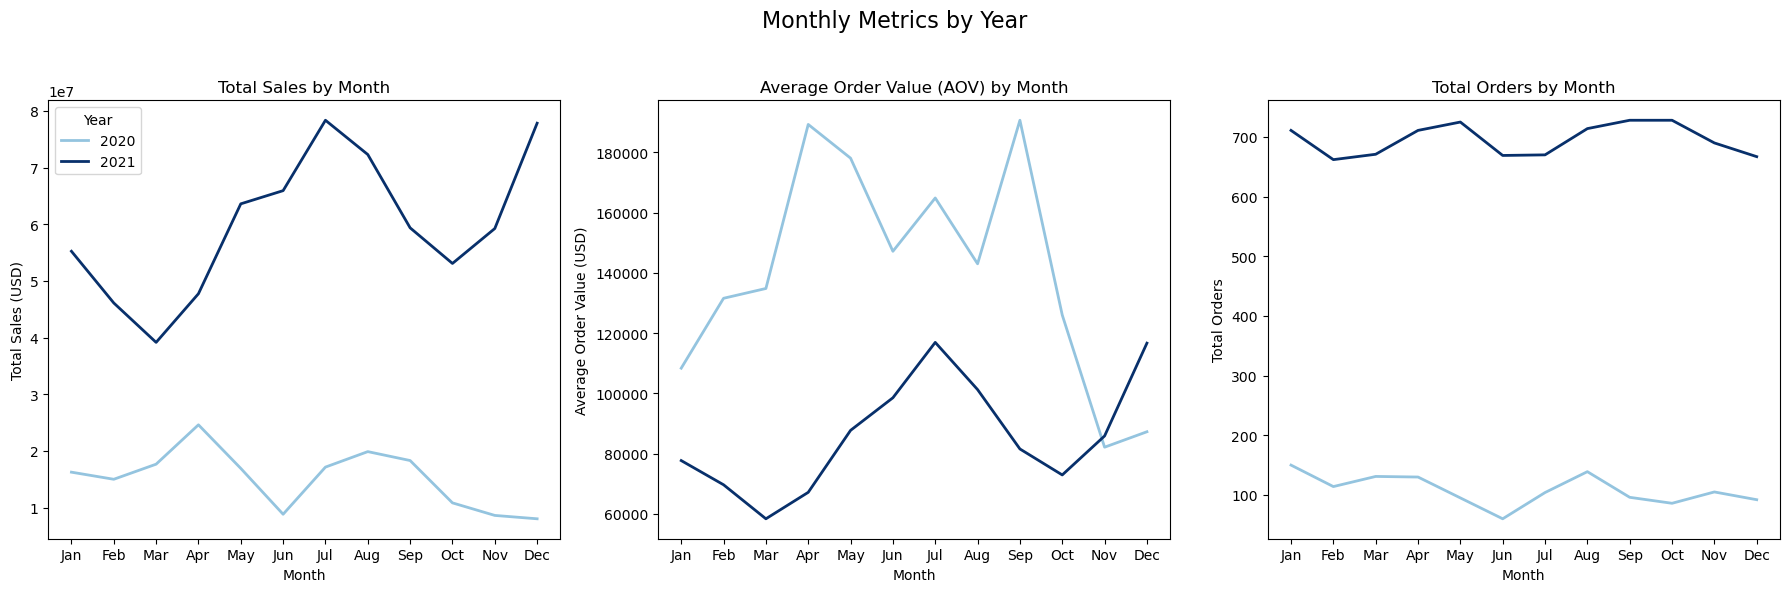

In [187]:
# Extract year and month from the date index if not already done
monthly_summary['year'] = monthly_summary.index.year
monthly_summary['month'] = monthly_summary.index.month

# Set up the figure for line charts only
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Define colors for each year using the 'Blues' colormap
years = monthly_summary['year'].unique()
colors = plt.cm.Blues(np.linspace(0.4, 1, len(years)))  # Shades of blue from light to dark

# Metrics to plot
metrics = ['total_sales', 'avg_sales', 'total_orders']
titles = ['Total Sales by Month', 'Average Order Value (AOV) by Month', 'Total Orders by Month']
y_labels = ['Total Sales (USD)', 'Average Order Value (USD)', 'Total Orders']

# Plot line charts for each metric
for i, (metric, title, y_label) in enumerate(zip(metrics, titles, y_labels)):
    for j, year in enumerate(years):
        yearly_data = monthly_summary[monthly_summary['year'] == year]
        axes[i].plot(yearly_data['month'], yearly_data[metric], label=f'{year}', color=colors[j], linewidth=2)
    axes[i].set_title(title)
    axes[i].set_ylabel(y_label)
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].set_xlabel('Month')
    if i == 0:
        axes[i].legend(title='Year', loc='upper left')

# Final layout adjustments
plt.suptitle('Monthly Metrics by Year', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

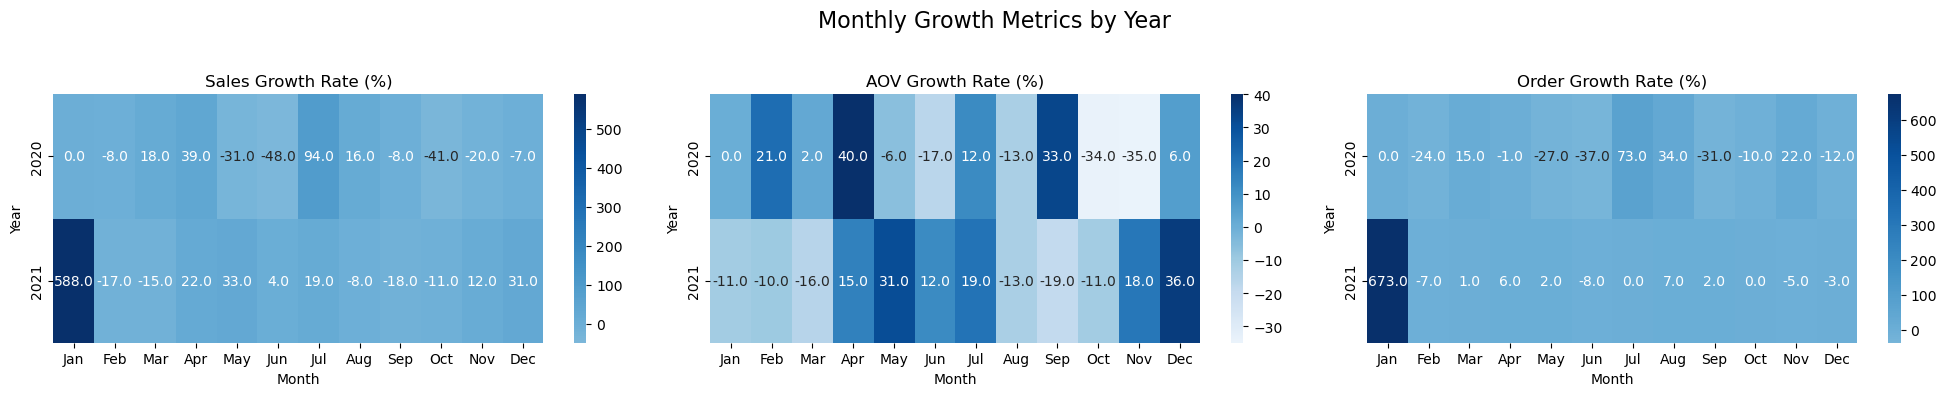

In [66]:
# Extract year and month from the date index if not already done
monthly_summary['year'] = monthly_summary.index.year
monthly_summary['month'] = monthly_summary.index.month

# Set up the figure for heatmaps only
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

# Metrics to plot for heatmaps
growth_metrics = ['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate']
growth_titles = ['Sales Growth Rate (%)', 'AOV Growth Rate (%)', 'Order Growth Rate (%)']

# Plot heatmaps for growth rates
for i, (growth_metric, growth_title) in enumerate(zip(growth_metrics, growth_titles)):
    growth_data = monthly_summary.pivot_table(index='year', columns='month', values=growth_metric)
    heatmap = sns.heatmap(
        growth_data,
        cmap='Blues',  # Monochromatic blue colormap
        ax=axes[i],
        cbar=True,
        annot=True,
        fmt=".1f",
        center=0
    )
    axes[i].set_title(growth_title)
    axes[i].set_xticks(np.arange(0.5, 12))  # Adjust xticks to align with heatmap cells
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Year')

# Final layout adjustments
plt.suptitle('Monthly Growth Metrics by Year', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Quartely Summary

Analyzing important monthly metrics including total sales, average sales, average order value and sales growth rates. Understanding these trends can highlight business health over time, seasonality, and promotional opportunities. 

In [68]:
quarterly_summary = df.groupby(df['invoice_date'].dt.to_period('Q').rename('purchase_quarter')).agg(
    total_sales=('total_sales', 'sum'),
    avg_sales=('total_sales', 'mean'),
    total_orders=('transaction_number', 'count')
)

# Calculate the growth rate for each metric
quarterly_summary['sales_growth_rate'] = quarterly_summary['total_sales'].pct_change() * 100
quarterly_summary['aov_growth_rate'] = quarterly_summary['avg_sales'].pct_change() * 100
quarterly_summary['order_growth_rate'] = quarterly_summary['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
quarterly_summary = quarterly_summary.fillna(0).round(0).astype(int)

# Apply background gradient to the growth columns with a custom colormap
styled_summary = quarterly_summary.style.format("{:,}")  # Apply comma formatting
styled_summary = styled_summary.background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="Blues",  
    vmin=-100,      # Set minimum for orange on the left end
    vmax=100        # Set maximum for green on the right end
)

# Display the styled DataFrame
styled_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
purchase_quarter,,,,,,
2020Q1,"48,912,311","123,829",395,0,0,0
2020Q2,"50,354,839","176,684",285,3,43,-28
2020Q3,"55,328,429","163,211",339,10,-8,19
2020Q4,"27,485,096","97,120",283,-50,-40,-17
2021Q1,"140,476,093","68,726","2,044",411,-29,622
2021Q2,"177,240,198","84,200","2,105",26,23,3
2021Q3,"209,979,925","99,422","2,112",18,18,0
2021Q4,"190,125,234","91,187","2,085",-9,-8,-1


#### Yearly Summary

Analyzing important monthly metrics including total sales, average sales, average order value and sales growth rates. Understanding these trends can highlight business health over time, seasonality, and promotional opportunities. 

In [70]:
yearly_summary = df.groupby(df['invoice_date'].dt.to_period('Y').rename('sale_year')).agg(
    total_sales =('total_sales', 'sum'),
    avg_sales= ('total_sales', 'mean'),
    total_orders= ('transaction_number', 'count')
)

# Calculate the growth rate for each metric
yearly_summary['sales_growth_rate'] = yearly_summary['total_sales'].pct_change() * 100
yearly_summary['aov_growth_rate'] = yearly_summary['avg_sales'].pct_change() * 100
yearly_summary['order_growth_rate'] = yearly_summary['total_orders'].pct_change() * 100

# Fill NaN values with 0, round, and convert to integers
yearly_summary = yearly_summary.fillna(0).round(0).astype(int)

# Apply background gradient to the growth columns with a custom colormap
styled_summary = yearly_summary.style.format("{:,}")  # Apply comma formatting
styled_summary = styled_summary.background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="Blues",
    vmin=-100,      # Set minimum for orange on the left end
    vmax=100        # Set maximum for green on the right end
)

# Display the styled DataFrame
styled_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
sale_year,,,,,,
2020,"182,080,675","139,847","1,302",0,0,0
2021,"717,821,450","86,008","8,346",294,-38,541


----

#### Regional Sales Trends

Analyzing sales across regions to identify geographic performance and potential growth opportunities, which helps in the discussion of market expansion and tailored marketing efforts. 

In [72]:
# Ensure the invoice_date is in datetime format
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Group by region and month
df['sale_month'] = df['invoice_date'].dt.to_period('M')

# Group by region and sale month, calculating the necessary metrics
monthly_region_summary = df.groupby(['region', 'sale_month']).agg(
    total_sales=('total_sales', 'sum'),
    avg_sales=('total_sales', 'mean'),
    total_orders=('transaction_number', 'count'),
)

# Calculate the month-over-month growth for each metric
monthly_region_summary['sales_growth_rate'] = monthly_region_summary.groupby('region')['total_sales'].pct_change() * 100
monthly_region_summary['aov_growth_rate'] = monthly_region_summary.groupby('region')['avg_sales'].pct_change() * 100
monthly_region_summary['order_growth_rate'] = monthly_region_summary.groupby('region')['total_orders'].pct_change() * 100

# Fill NaN values with 0 (for the first month, as there’s no previous month to compare)
monthly_region_summary = monthly_region_summary.fillna(0)

# Round values for better readability
monthly_region_summary = monthly_region_summary.round(2)

# Apply styling for better visualization
styled_monthly_region_summary = monthly_region_summary.style.format("{:,}")  # Apply comma formatting
styled_monthly_region_summary = styled_monthly_region_summary.background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="Blues",  # Blue color gradient for growth
    vmin=-100,      # Set minimum for negative growth
    vmax=100        # Set maximum for positive growth
)

# Display the styled DataFrame
styled_monthly_region_summary

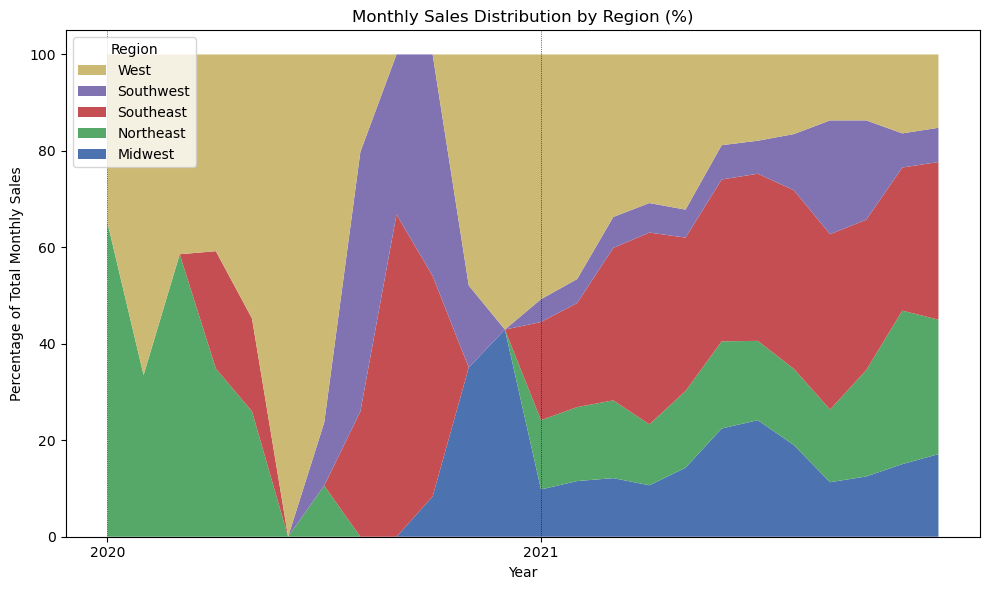

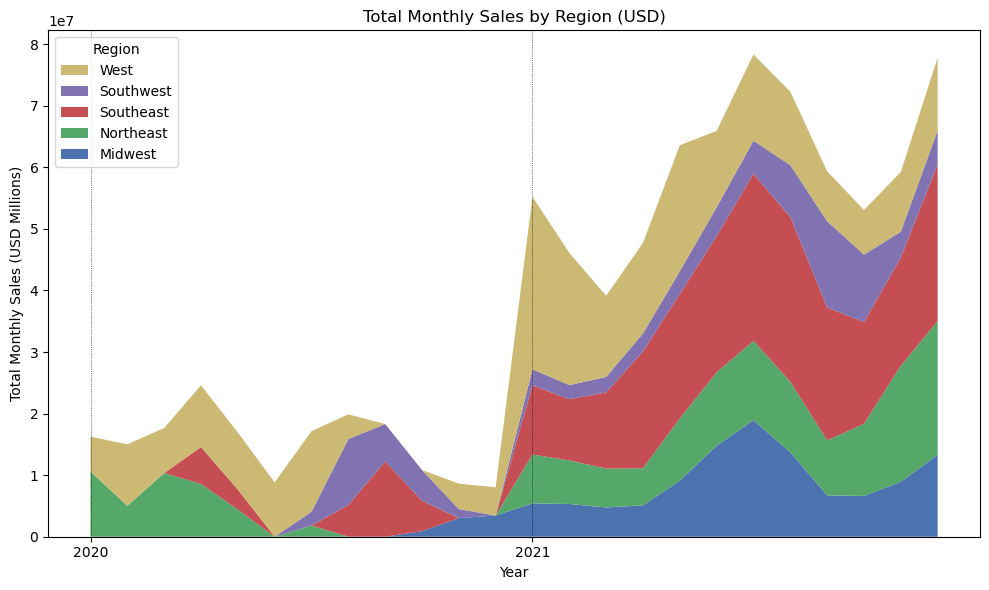

In [157]:
# Group by region and month to find monthly total sales
monthly_sales = df.groupby([df['invoice_date'].dt.to_period('M'), 'region'])['total_sales'].sum().unstack(fill_value=0)

# Normalize to get the percentage contribution of each region per month
monthly_sales_percent = monthly_sales.div(monthly_sales.sum(axis=1), axis=0) * 100

# Define a function to plot stacked area charts with yearly markers and yearly x-axis labels
def plot_stacked_area(data, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.stackplot(data.index.astype(str), data.T, labels=data.columns)

    # Add vertical lines at the start of each year
    years = sorted(data.index.year.unique())
    for year in years:
        plt.axvline(x=f'{year}-01', color='black', linestyle=':', linewidth=0.5)

    # Reverse legend order to match stacking
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], loc='upper left', title='Region')

    # Set titles and labels
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)

    # Show only years on the x-axis labels
    plt.xticks([f"{year}-01" for year in years], [str(year) for year in years])

    plt.tight_layout()
    plt.show()

# Plot the percentage stacked area chart
plt.style.use('seaborn-v0_8-deep')
plot_stacked_area(
    monthly_sales_percent,
    title='Monthly Sales Distribution by Region (%)',
    ylabel='Percentage of Total Monthly Sales'
)

# Plot the total sales stacked area chart
plot_stacked_area(
    monthly_sales,
    title='Total Monthly Sales by Region (USD)',
    ylabel='Total Monthly Sales (USD Millions)'
)

#### State and City Findings

In order to help maximize market growth, the five cities(and states) with the highest total generated revenue will be listed to understand where within the regions that perform the best.

In [159]:
# Group by region, state, and city, and calculate total sales
city_state_sales = df.groupby(['region', 'state', 'city']).agg(
    total_sales=('total_sales', 'sum')
).reset_index()

# Sort the data by region and total_sales in descending order
city_state_sales = city_state_sales.sort_values(['region', 'total_sales'], ascending=[True, False])

# Get the top 5 cities for each region
top_cities_per_region = city_state_sales.groupby('region').head(5)

# Display the results for each region
regions = top_cities_per_region['region'].unique()

for region in regions:
    print(f"Top 5 highest-selling cities in Region: {region}\n")
    region_top_cities = top_cities_per_region[top_cities_per_region['region'] == region]
    print(region_top_cities[['state', 'city', 'total_sales']].to_string(index=False))
    print("\n")

Top 5 highest-selling cities in Region: Midwest

   state      city  total_sales
Michigan   Detroit     18625433
    Ohio  Columbus     18484583
  Kansas   Wichita      9972864
Illinois   Chicago      9797488
Missouri St. Louis      9683265


Top 5 highest-selling cities in Region: Northeast

        state       city  total_sales
     New York   New York     39801235
     New York     Albany     24427804
New Hampshire Manchester     16411667
      Vermont Burlington     14352923
     Delaware Wilmington     12298412


Top 5 highest-selling cities in Region: Southeast

         state        city  total_sales
       Florida       Miami     31600863
South Carolina  Charleston     29285637
       Florida     Orlando     27682851
North Carolina   Charlotte     23956531
     Louisiana New Orleans     23750781


Top 5 highest-selling cities in Region: Southwest

     state          city  total_sales
     Texas       Houston     25456882
     Texas        Dallas     20902864
New Mexico   Albuq

____

#### Product Performance Analysis

Analyzing top products, focusing on metrics such as total sales, average sales, and growth rates. This will determine where Adidas's strongest products are, and identifies areas for improvement.

In [161]:
product_performance = df.groupby('product').agg(
    total_revenue=('total_sales', 'sum'),
    total_revenue_pct=('total_sales', lambda x: x.sum() / df['total_sales'].sum() * 100),
    avg_daily_sales=('total_sales', 'mean'),
    order_count=('transaction_number', 'count'),
    order_count_pct=('transaction_number', lambda x: x.count() / df['transaction_number'].count() * 100)
)

# Sort by Total Revenue in descending order
product_performance = product_performance.sort_values(by='total_revenue', ascending=False)

# Round values to two decimal places
product_performance = product_performance.round(2)

# Apply background gradients and comma formatting
styled_product_performance = product_performance.style.format("{:,.2f}").background_gradient(
    subset=['avg_daily_sales', 'total_revenue_pct', 'order_count_pct'],
    cmap="Greens",  # White to Green gradient
    vmin=0
).background_gradient(
    cmap="Blues",    # White to Red gradient
    vmin=0
)

# Display the styled DataFrame
styled_product_performance

,total_revenue,total_revenue_pct,avg_daily_sales,order_count,order_count_pct
product,,,,,
Men's Street Footwear,"208,826,244.00",23.21,"129,705.74","1,610.00",16.69
Women's Apparel,"179,038,860.00",19.90,"111,342.57","1,608.00",16.67
Men's Athletic Footwear,"153,673,680.00",17.08,"95,449.49","1,610.00",16.69
Women's Street Footwear,"128,002,813.00",14.22,"79,603.74","1,608.00",16.67
Men's Apparel,"123,728,632.00",13.75,"77,041.49","1,606.00",16.65
Women's Athletic Footwear,"106,631,896.00",11.85,"66,395.95","1,606.00",16.65


In [ ]:
# Saving file to Excel for use in SQL and Tableau
try:
    df.to_excel('updated_adidas_sales.xlsx', engine = 'openpyxl', index = False)
except FileError:
    print('Error')